In [1]:
#!pip install fiona
#!pip install pyogrio

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [3]:
# what is it?
type(countries)


geopandas.geodataframe.GeoDataFrame

In [4]:
# dimensions
countries.shape

(252, 2)

In [5]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [6]:
# some content
countries.head()

COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

In [7]:
# any missing values?
countries[countries.isna().any(axis=1)]

Empty GeoDataFrame
Columns: [COUNTRY, geometry]
Index: []

In [8]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


In [9]:
#pip install matplotlib

<Axes: >

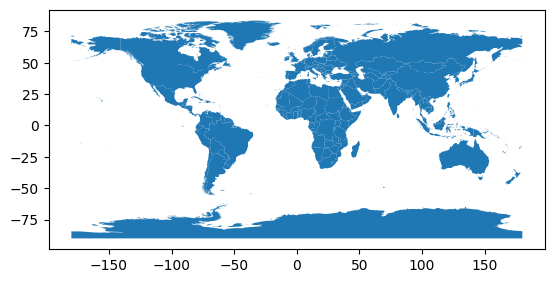

In [10]:
# plot simple

countries.plot()

In [11]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [12]:
rivers.head()

NAME  SYSTEM                                           geometry
0      Aldan    Lena  LINESTRING (124.00678 56.47258, 123.25956 56.6...
1     Amazon  Amazon  MULTILINESTRING ((-61.27730 -3.60706, -60.6846...
2  Amu Darya     NaN  LINESTRING (73.98818 37.49952, 73.52595 37.528...
3       Amur     NaN  LINESTRING (122.63956 49.99730, 120.47874 49.2...
4     Angara     NaN  LINESTRING (105.07841 51.93053, 103.92959 51.7...

<Axes: >

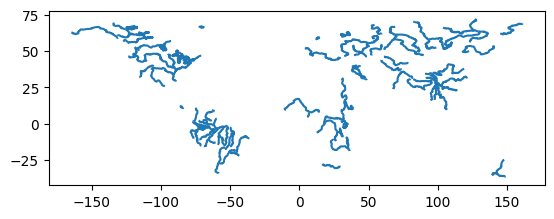

In [13]:
# visualizing rivers
rivers.plot()

<Axes: >

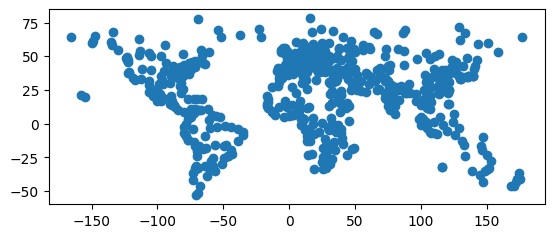

In [14]:
# visualizing cities
cities.plot()


<Axes: >

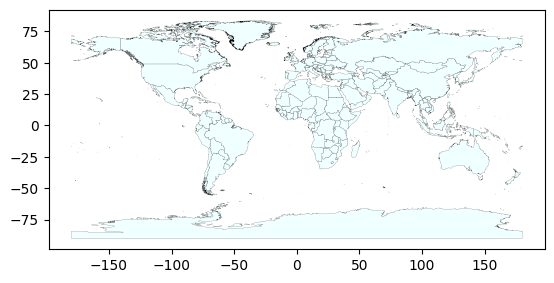

In [15]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

<Axes: >

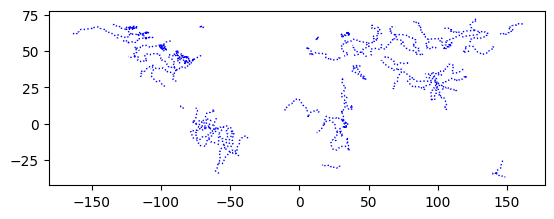

In [16]:
rivers.plot(edgecolor='blue', 
            linewidth=1,
            linestyle='dotted')

<Axes: >

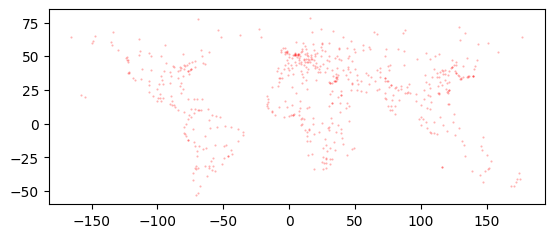

In [17]:
cities.plot(marker='.', # marker type
            color='red', 
            markersize=1,
            alpha=0.3) # transparency

In [18]:
cities.head()

NAME COUNTRY CAPITAL                    geometry
0          Murmansk  Russia       N   POINT (33.08604 68.96355)
1       Arkhangelsk  Russia       N   POINT (40.64616 64.52067)
2  Saint Petersburg  Russia       N   POINT (30.45333 59.95189)
3           Magadan  Russia       N  POINT (150.78001 59.57100)
4             Perm'  Russia       N   POINT (56.23246 58.00024)

In [19]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

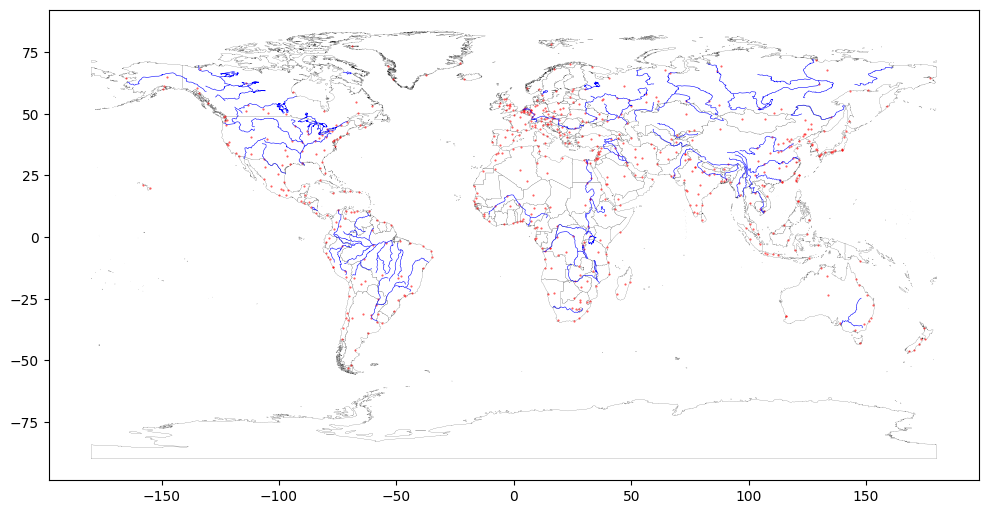

In [22]:
base = countries.plot(facecolor="white", edgecolor='black', linewidth=0.1,figsize=(12,12))
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of..
rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of..

In [23]:
#pip install folium


In [24]:
import folium

In [25]:
#pip install mapclassify

In [26]:
m = cities.explore(color="red", 
                   name="cities")#optional

m = rivers.explore(m=m, color="blue",
                   name="rivers")#optional
#folium.LayerControl().add_to(m) #optional
m


In [27]:
brasil=countries[countries.COUNTRY=='Brazil']

In [28]:
cities_clipped = gpd.clip(gdf=cities,
                          mask=brasil)
rivers_clipped = gpd.clip(gdf=rivers,
                               mask=brasil)

<Axes: >

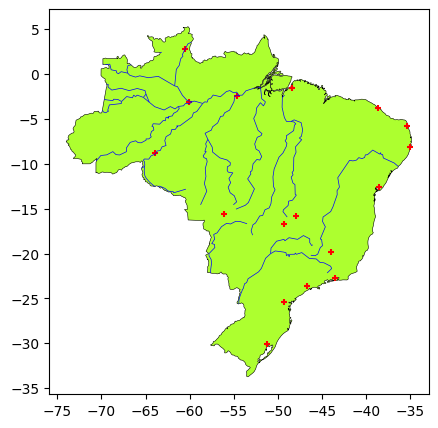

In [29]:
base = brasil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_clipped.plot(marker='+', color='red', markersize=15,ax=base)
rivers_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [30]:
brazilCoord=[-14.235004, -51.92528]

In [31]:
m = cities.explore(location=brazilCoord,
                   zoom_start=4.5,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers.explore(m=m, color="blue",
                   name="rivers")#optional
# folium.LayerControl().add_to(m) #optional
m

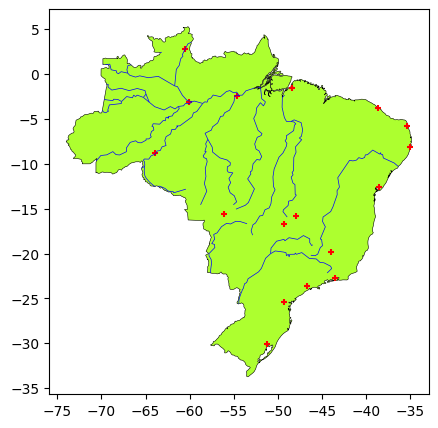

In [32]:
# save the map as image
import matplotlib.pyplot as plt

base = brasil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_clipped.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("maps",'mapEnd.jpg'))

In [33]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [34]:
worldMaps='https://github.com/lizBadillo/introgeodf/raw/main/maps/worldMaps.gpkg'

In [35]:
from  fiona import listlayers

listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [36]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

<Axes: >

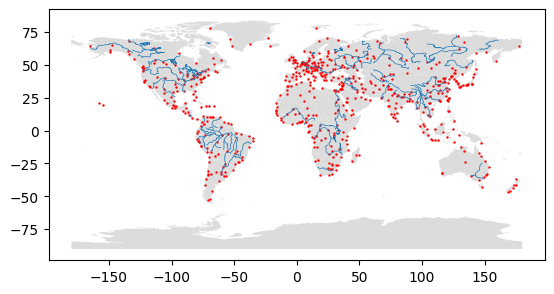

In [37]:
base = countries.plot(facecolor='gainsboro')
cities.plot(ax=base, markersize=0.5, color='red') 
rivers.plot(ax=base, linewidth=0.5)

In [38]:
import os
os.environ['USE_PYGEOS'] = '0' # only if you have pygeos

import geopandas as gpd
from  fiona import listlayers

#maps
worldMaps='https://github.com/lizBadillo/introgeodf/raw/main/maps/worldMaps.gpkg'

#layers in maps
listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [39]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [40]:
countries.crs.to_epsg()==cities.crs.to_epsg()==rivers.crs.to_epsg()

True

<Axes: >

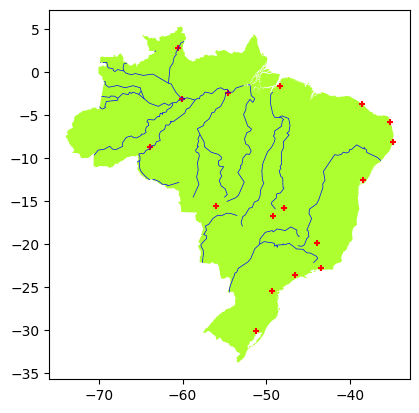

In [41]:
# just brazil
brazil=countries[countries.COUNTRY=='Brazil']

# clipping
brazil_cities= gpd.clip(gdf=cities,mask=brazil)
brazil_rivers = gpd.clip(gdf=rivers,mask=brazil)

# plotting
base = brazil.plot(facecolor="greenyellow")
brazil_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
brazil_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [42]:
# unit is in degrees:
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [43]:
# centroid
brazil.centroid

C:\Users\lizbe\AppData\Local\Temp\ipykernel_8636\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

In [44]:
brazil.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [45]:
# operations that require projected CRS will work:
brazil.to_crs(3587).centroid

29    POINT (11374671.933 -6303368.608)
dtype: geometry

<Axes: >

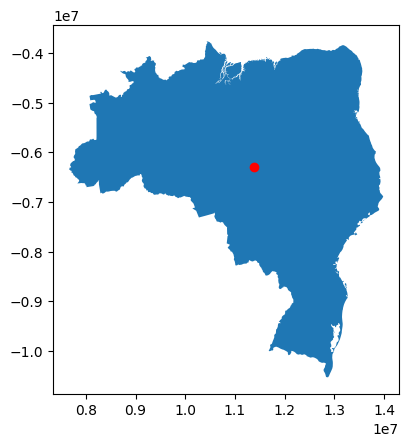

In [46]:
# plot this projected version

base3587=brazil.to_crs(3587).plot()
brazil.to_crs(3587).centroid.plot(color='red',ax=base3587)

In [47]:
# recommended for Brazil (meters)
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [48]:
# this works
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

<Axes: >

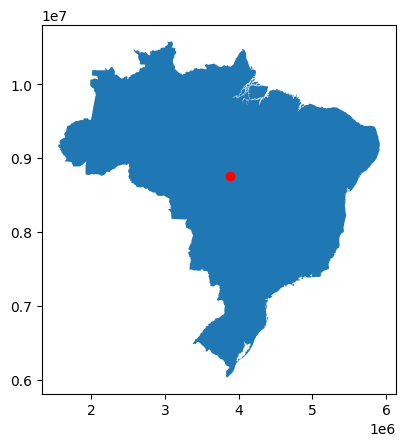

In [49]:
# replotting:

base5641=brazil.to_crs(5641).plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

C:\Users\lizbe\AppData\Local\Temp\ipykernel_8636\69087697.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid.plot(color='red',ax=ax2)


<Axes: title={'center': 'unprojected'}>

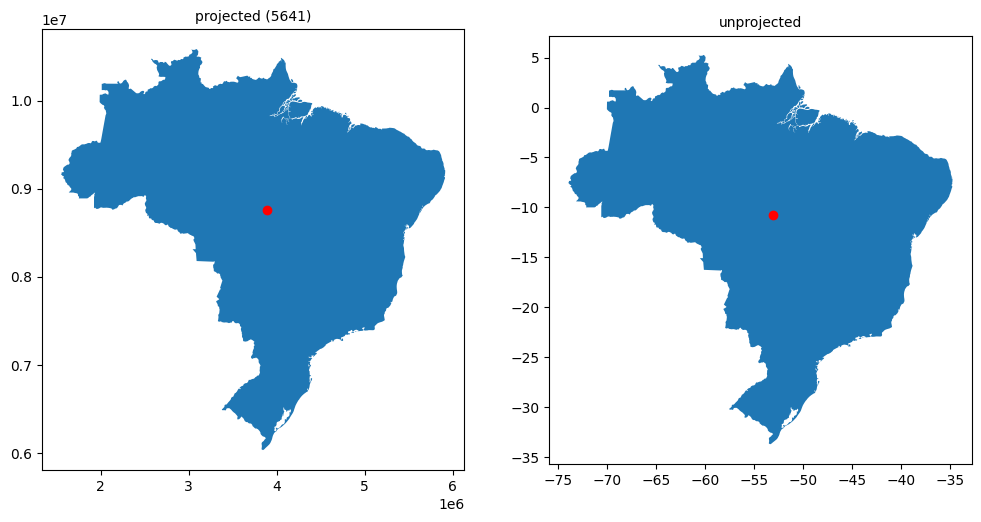

In [50]:
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (5641)',fontsize=10)
brazil.to_crs(5641).plot(ax=ax1)
brazil.to_crs(5641).centroid.plot(color='red',ax=ax1)

ax2.set_title('unprojected',fontsize=10)
brazil.plot(ax=ax2)
brazil.centroid.plot(color='red',ax=ax2)

In [51]:
brazil_5641=brazil.to_crs(5641)
# just Brazil

cities_5641=cities.to_crs(brazil_5641.crs)
cities_5641=cities_5641[cities_5641.COUNTRY=='Brazil']

rivers_5641=rivers.to_crs(brazil_5641.crs)
rivers_5641=gpd.clip(gdf=rivers_5641,mask=brazil_5641)

In [52]:
# saving 
import os

brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")

In [53]:
brazil_5641

COUNTRY                                           geometry
29  Brazil  MULTIPOLYGON (((1926257.542 8894978.397, 19262...

In [54]:
brazil_5641.boundary


29    MULTILINESTRING ((1926257.542 8894978.397, 192...
dtype: geometry

<Axes: >

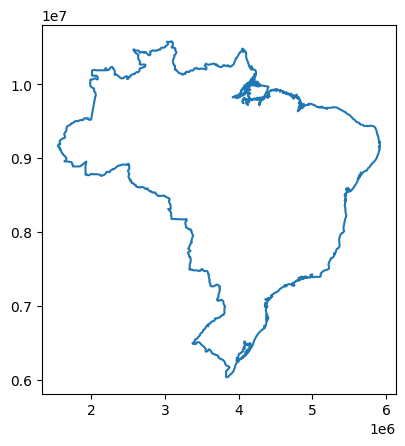

In [55]:
# This is just the borderline
brazil_5641.boundary.plot()

In [56]:
# does 'boundary' return a GDF?
type(brazil_5641.boundary)


geopandas.geoseries.GeoSeries

In [57]:
# converting into GDF
brazil_5641.boundary.to_frame()

0
29  MULTILINESTRING ((1926257.542 8894978.397, 192...

In [58]:
# conversion
brazil_5641DF=brazil_5641.boundary.to_frame() 

# new column (optional)
brazil_5641DF['name']='Brazil' 

# renaming the geometry column
brazil_5641DF.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
brazil_5641DF = brazil_5641DF.set_geometry("geometry")

# verifying:
brazil_5641DF.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [59]:
brazil_5641DF.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='border', driver="GPKG")

In [60]:
brazil_states=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))
brazil_municipalities=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm2_ibge_2020.shp"))

In [61]:
brazil_states.crs, brazil_municipalities.crs

(None, None)

<Axes: >

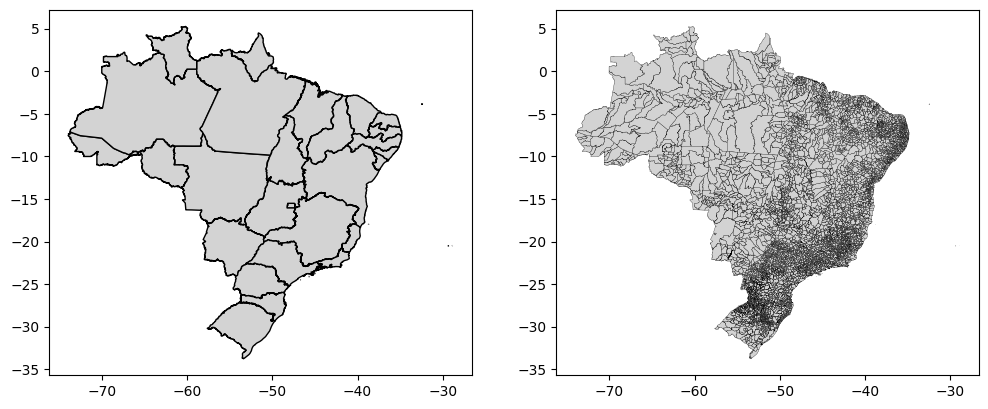

In [62]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

brazil_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
brazil_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [63]:
brazil_states.to_crs(5641)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [64]:
brazil_states.geometry

0     MULTIPOLYGON (((-68.87747 -11.01987, -68.88027...
1     POLYGON ((-35.46317 -8.82467, -35.46457 -8.828...
2     MULTIPOLYGON (((-50.46147 2.11133, -50.45627 2...
3     MULTIPOLYGON (((-58.49367 -0.84197, -58.48917 ...
4     MULTIPOLYGON (((-38.70687 -17.96447, -38.70867...
5     MULTIPOLYGON (((-39.90847 -2.87407, -39.91257 ...
6     POLYGON ((-47.37689 -15.88092, -47.37781 -15.8...
7     MULTIPOLYGON (((-29.29937 -20.51987, -29.30147...
8     MULTIPOLYGON (((-47.28117 -17.12687, -47.27627...
9     MULTIPOLYGON (((-47.03127 -8.98527, -47.03537 ...
10    MULTIPOLYGON (((-56.65037 -17.32567, -56.64427...
11    MULTIPOLYGON (((-57.45677 -22.18997, -57.45467...
12    MULTIPOLYGON (((-47.14037 -17.00607, -47.14357...
13    MULTIPOLYGON (((-46.43447 -1.01537, -46.43887 ...
14    MULTIPOLYGON (((-34.86147 -6.98137, -34.85677 ...
15    MULTIPOLYGON (((-49.54087 -26.22697, -49.53667...
16    MULTIPOLYGON (((-34.96727 -8.37597, -34.96567 ...
17    POLYGON ((-41.78067 -2.76077, -41.77927 -2

In [65]:
brazil_states.crs = "EPSG:4326"
brazil_municipalities.crs = "EPSG:4326"

In [66]:
brazil_states_5641=brazil_states.to_crs(5641)
brazil_municipalities_5641=brazil_municipalities.to_crs(5641)

In [67]:
brazil_states_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='states', driver="GPKG")
brazil_municipalities_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='municipalities', driver="GPKG")

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in th

<Axes: title={'center': 'Below_Centroid, RightOf_Centroid'}>

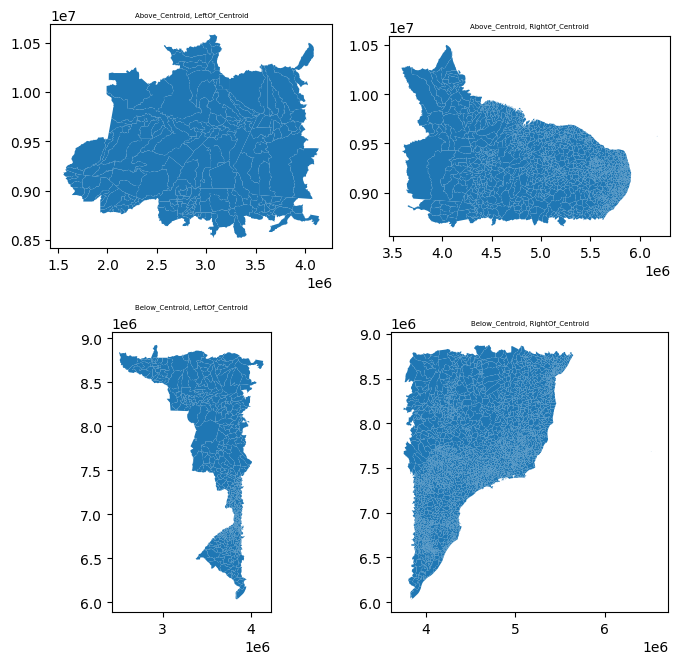

In [68]:
centroBrazil=brazil_5641.centroid


fig, axs = pyplot.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0,0].set_title('Above_Centroid, LeftOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:].plot(ax=axs[0,0]) 

axs[0,1].set_title('Above_Centroid, RightOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[centroBrazil.x:,centroBrazil.y:].plot(ax=axs[0,1]) 

axs[1,0].set_title('Below_Centroid, LeftOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[:centroBrazil.x,:centroBrazil.y].plot(ax=axs[1,0]) 

axs[1,1].set_title('Below_Centroid, RightOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[centroBrazil.x:,:centroBrazil.y].plot(ax=axs[1,1]) 

In [69]:
#instead of:
brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:]

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


ADM0_EN ADM0_PT ADM0_PCODE      ADM1_PT ADM1_PCODE  \
1     Brazil  Brasil         BR     Rondônia       BR11   
3     Brazil  Brasil         BR     Rondônia       BR11   
8     Brazil  Brasil         BR     Rondônia       BR11   
9     Brazil  Brasil         BR     Rondônia       BR11   
10    Brazil  Brasil         BR     Rondônia       BR11   
...      ...     ...        ...          ...        ...   
5305  Brazil  Brasil         BR  Mato Grosso       BR51   
5310  Brazil  Brasil         BR  Mato Grosso       BR51   
5313  Brazil  Brasil         BR  Mato Grosso       BR51   
5321  Brazil  Brasil         BR  Mato Grosso       BR51   
5324  Brazil  Brasil         BR  Mato Grosso       BR51   

                    ADM2_PT ADM2_PCODE  ET_ID  \
1                 Ariquemes  BR1100023      1   
3                    Cacoal  BR1100049      3   
8           Espigão D'Oeste  BR1100098      8   
9             Guajará-Mirim  BR1100106      9   
10                     Jaru  BR1100114     10   
...                     ...        ...    ...   
5305  São Félix do Araguaia  BR5107859   5305   
5310               Tabaporã  BR5107941   5310   
5313    Terra Nova do Norte  BR5108055   5313   
5321           Nova Guarita  BR5108808   5321   
5324       Nova Monte Verde  BR5108956   5324   

                                               geometry  
1     POLYGON ((2839173.154 8911097.984, 2838718.204...  
3     POLYGON ((2997393.730 8777661.276, 2997393.730...  
8     POLYGON ((3057637.194 8777929.305, 3056978.535...  
9     MULTIPOLYGON (((2708460.048 8727087.796, 27089...  
10    POLYGON ((2871236.909 8863979.571, 2871101.103...  
...                                                 ...  
5305  POLYGON ((3974265.397 8773180.057, 3974197.494...  
5310  POLYGON ((3505714.931 8812411.339, 3505972.962...  
5313  POLYGON ((3647944.371 8863821.903, 3657430.408...  
5321  POLYGON ((3638016.966 8872883.250, 3638098.449...  
5324  POLYGON ((3449722.190 8896410.060, 3449477.739...  

[191 rows x 9 columns]

In [70]:
# you create
Brazil_topLeft=brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:].dissolve()
# you get
Brazil_topLeft

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


geometry ADM0_EN ADM0_PT  \
0  MULTIPOLYGON (((2121072.695 8774540.983, 21207...  Brazil  Brasil   

  ADM0_PCODE   ADM1_PT ADM1_PCODE    ADM2_PT ADM2_PCODE  ET_ID  
0         BR  Rondônia       BR11  Ariquemes  BR1100023      1

In [71]:
Brazil_topLeft['zone']='NW'
Brazil_topLeft=Brazil_topLeft.loc[:,['ADM0_EN','zone','geometry']]   
Brazil_topLeft

ADM0_EN zone                                           geometry
0  Brazil   NW  MULTIPOLYGON (((2121072.695 8774540.983, 21207...

<Axes: >

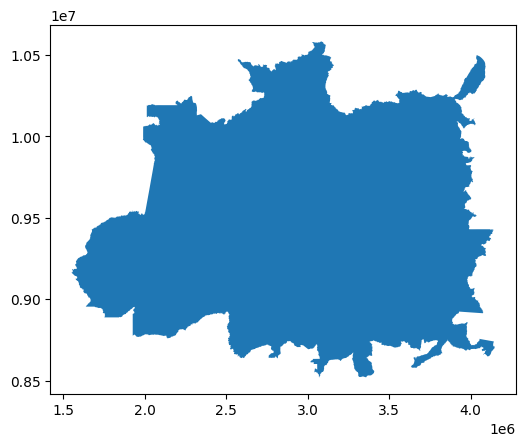

In [72]:
# this is the plot

Brazil_topLeft.plot()

In [73]:
rowsCX=(brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:].shape[0],\
brazil_municipalities_5641.cx[centroBrazil.x:,centroBrazil.y:].shape[0],\
brazil_municipalities_5641.cx[:centroBrazil.x,:centroBrazil.y].shape[0],\
brazil_municipalities_5641.cx[centroBrazil.x:,:centroBrazil.y].shape[0])
sum(rowsCX)

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in th

5753

In [74]:
sum(rowsCX)-brazil_municipalities_5641.shape[0]

181

In [75]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","br-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

id        ident                 type  \
0     #meta +id  #meta +code  #loc +airport +type   
1          5910         SBGR        large_airport   
2          5906         SBGL        large_airport   
3          5974         SBSP       medium_airport   
6701     309669         SSVR               closed   
6702     505308      BR-1760             heliport   
6703     341727      BR-1429             heliport   
6704     343017      BR-1493             heliport   

                                                   name latitude_deg  \
0                                   #loc +airport +name    #geo +lat   
1     Guarulhos - Governador André Franco Montoro In...   -23.431944   
2          Rio Galeão – Tom Jobim International Airport   -22.809999   
3                                     Congonhas Airport   -23.627657   
6701                              Volta Redonda Airport     -22.4978   
6702                       Unimed Volta Redonda Helipad   -22.533988   
6703                              Santa Helena Heliport    -23.59851   
6704              Bandeiras Centro Empresarial Heliport   -23.536615   

     longitude_deg         elevation_ft                 continent  \
0        #geo +lon  #geo +elevation +ft  #region +continent +code   
1       -46.467778                 2461                        SA   
2       -43.250557                   28                        SA   
3       -46.654601                 2631                        SA   
6701       -44.085                 1245                        SA   
6702    -44.076918                 1385                        SA   
6703    -47.441196                 2254                        SA   
6704    -47.449475                 1827                        SA   

        country_name           iso_country  ...              municipality  \
0     #country +name  #country +code +iso2  ...  #loc +municipality +name   
1             Brazil                    BR  ...                 São Paulo   
2             Brazil                    BR  ...            Rio De Janeiro   
3             Brazil                    BR  ...                 São Paulo   
6701          Brazil                    BR  ...             Volta Redonda   
6702          Brazil                    BR  ...             Volta Redonda   
6703          Brazil                    BR  ...                Votorantim   
6704          Brazil                    BR  ...                Votorantim   

       scheduled_service                  gps_code                  iata_code  \
0     #status +scheduled  #loc +airport +code +gps  #loc +airport +code +iata   
1                      1                      SBGR                        GRU   
2                      1                      SBGL                        GIG   
3                      1                      SBSP                        CGH   
6701                   0                       NaN                        NaN   
6702                   0                      SSKV                        NaN   
6703                   0                      SWHE                        NaN   
6704                   0                      SWST                        NaN   

                      local_code  \
0     #loc +airport +code +local   
1                         SP0002   
2                         RJ0001   
3                         SP0001   
6701                         NaN   
6702                      RJ0147   
6703                      SP0807   
6704                      SP1306   

                                              home_link  \
0                                   #meta +url +airport   
1                    http://www.aeroportoguarulhos.net/   
2                                                   NaN   
3     http://www.infraero.gov.br/usa/aero_prev_home....   
6701                                                NaN   
6702                                                NaN   
6703                                                NaN   
6704                                       

In [76]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

id ident            type  \
0  5910  SBGR   large_airport   
1  5906  SBGL   large_airport   
2  5974  SBSP  medium_airport   
3  5967  SBRJ  medium_airport   
4  5872  SBBR   large_airport   

                                                name latitude_deg  \
0  Guarulhos - Governador André Franco Montoro In...   -23.431944   
1       Rio Galeão – Tom Jobim International Airport   -22.809999   
2                                  Congonhas Airport   -23.627657   
3                              Santos Dumont Airport     -22.9105   
4  Presidente Juscelino Kubitschek International ...   -15.869167   

  longitude_deg elevation_ft continent country_name iso_country  ...  \
0    -46.467778         2461        SA       Brazil          BR  ...   
1    -43.250557           28        SA       Brazil          BR  ...   
2    -46.654601         2631        SA       Brazil          BR  ...   
3    -43.163101           11        SA       Brazil          BR  ...   
4    -47.920834         3497        SA       Brazil          BR  ...   

     municipality scheduled_service gps_code iata_code local_code  \
0       São Paulo                 1     SBGR       GRU     SP0002   
1  Rio De Janeiro                 1     SBGL       GIG     RJ0001   
2       São Paulo                 1     SBSP       CGH     SP0001   
3  Rio de Janeiro                 1     SBRJ       SDU     RJ0002   
4        Brasília                 1     SBBR       BSB     DF0001   

                                           home_link  \
0                 http://www.aeroportoguarulhos.net/   
1                                                NaN   
2  http://www.infraero.gov.br/usa/aero_prev_home....   
3  https://www4.infraero.gov.br/aeroportos/aeropo...   
4  http://www.infraero.gov.br/usa/aero_prev_home....   

                                      wikipedia_link  \
0  https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...   
1  https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...   
2  https://en.wikipedia.org/wiki/Congonhas-S%C3%A...   
3  https://en.wikipedia.org/wiki/Santos_Dumont_Ai...   
4  https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...   

                                            keywords    score  \
0                                            Cumbica  1016675   
1  Galeão - Antônio Carlos Jobim International Ai...    51475   
2  http://www.infraero.gov.br/usa/aero_prev_home....      750   
3                                                RIO      750   
4                                                NaN    51275   

                last_updated  
0  2021-10-28T15:52:55+00:00  
1  2021-10-14T18:09:35+00:00  
2  2022-05-03T20:10:35+00:00  
3  2022-03-28T23:27:00+00:00  
4  2020-08-24T11:15:12+00:00  

[5 rows x 23 columns]

In [77]:
# keep the  columns needed

infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [78]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [79]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6704 non-null   object
 1   type           6704 non-null   object
 2   latitude_deg   6704 non-null   object
 3   longitude_deg  6704 non-null   object
 4   elevation_ft   6533 non-null   object
 5   region_name    6704 non-null   object
 6   municipality   6680 non-null   object
dtypes: object(7)
memory usage: 366.8+ KB


In [80]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6704 non-null   object 
 1   type           6704 non-null   object 
 2   latitude_deg   6704 non-null   float64
 3   longitude_deg  6704 non-null   float64
 4   elevation_ft   6533 non-null   float64
 5   region_name    6704 non-null   object 
 6   municipality   6680 non-null   object 
dtypes: float64(3), object(4)
memory usage: 366.8+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

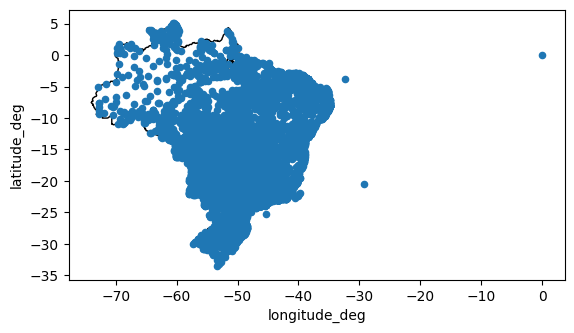

In [81]:
# let's plot

base = brazil.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [82]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=brazil.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

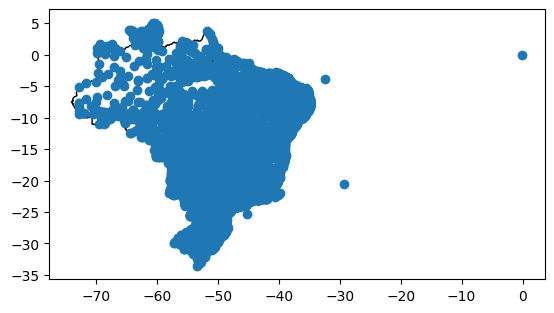

In [83]:
# does it look better?

# let's plot

base = brazil.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [84]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

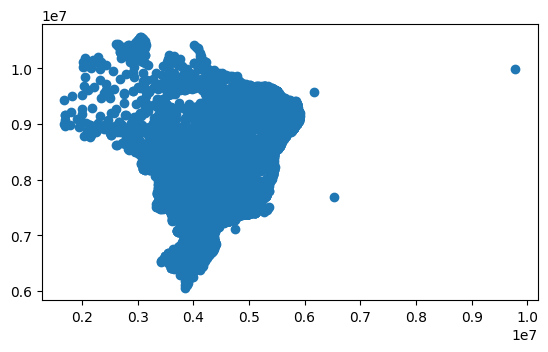

In [85]:
airports.to_crs(5641).plot()


In [86]:
# this does not:
infoairports.to_crs(5641).plot()

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [91]:
airports_5641=airports.to_crs(5641)

In [92]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     4613
heliport          1704
closed             253
medium_airport     124
large_airport        8
seaplane_base        2
Name: count, dtype: int64

In [93]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

In [94]:
from folium import LayerControl

m = airports_5641[airports_5641.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports_5641[airports_5641.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports_5641[airports_5641.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports_5641[airports_5641.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports_5641[airports_5641.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports_5641[airports_5641.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [95]:
airports_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"),layer='airports', driver="GPKG")

In [96]:
# in a polygon
Brazil_topLeft

ADM0_EN zone                                           geometry
0  Brazil   NW  MULTIPOLYGON (((2121072.695 8774540.983, 21207...

<Axes: >

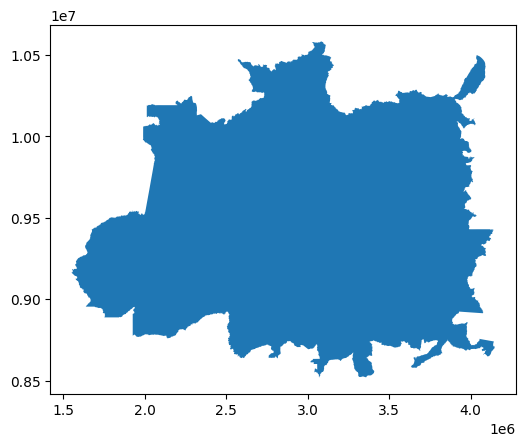

In [97]:
Brazil_topLeft.plot()

In [98]:
Brazil_topLeft.convex_hull

0    POLYGON ((3071557.291 8521541.630, 3070932.584...
dtype: geometry

<Axes: >

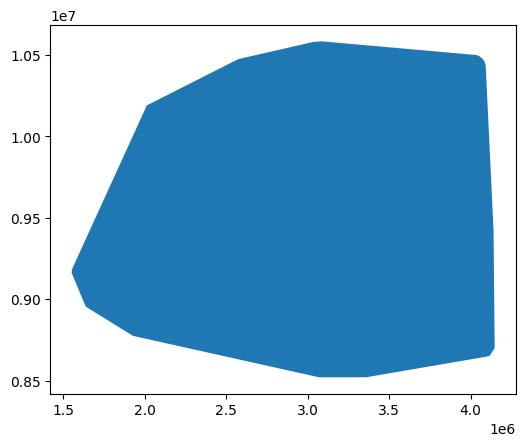

In [99]:
Brazil_topLeft.convex_hull.plot()

In [100]:
large_airport=airports_5641[airports_5641.kind=='large_airport']
# several rows
large_airport

name           kind  \
0   Guarulhos - Governador André Franco Montoro In...  large_airport   
1        Rio Galeão – Tom Jobim International Airport  large_airport   
4   Presidente Juscelino Kubitschek International ...  large_airport   
5   Deputado Luiz Eduardo Magalhães International ...  large_airport   
9                Tancredo Neves International Airport  large_airport   
10                Eduardo Gomes International Airport  large_airport   
14                 Hercílio Luz International Airport  large_airport   
16  Val de Cans/Júlio Cezar Ribeiro International ...  large_airport   

    latitude_deg  longitude_deg  elevation_ft       region_name  \
0     -23.431944     -46.467778        2461.0         São Paulo   
1     -22.809999     -43.250557          28.0    Rio de Janeiro   
4     -15.869167     -47.920834        3497.0  Distrito Federal   
5     -12.908611     -38.322498          64.0             Bahia   
9     -19.635710     -43.966928        2721.0      Minas Gerais   
10     -3.038610     -60.049702         264.0          Amazonas   
14    -27.670279     -48.552502          16.0    Santa Catarina   
16     -1.379279     -48.476207          54.0              Pará   

      municipality                         geometry  
0        São Paulo  POINT (4614202.306 7334259.930)  
1   Rio De Janeiro  POINT (4972125.000 7409069.810)  
4         Brasília  POINT (4452546.729 8223176.558)  
5         Salvador  POINT (5520382.068 8561117.560)  
9   Belo Horizonte  POINT (4892427.199 7785766.984)  
10          Manaus  POINT (3103184.311 9664051.584)  
14   Florianópolis  POINT (4382272.317 6814299.684)  
16           Belém  POINT (4390760.299 9847564.588)

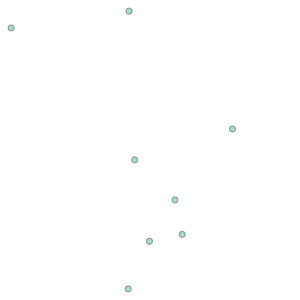

In [101]:
large_airport.unary_union

In [102]:
gpd.GeoSeries(large_airport.unary_union)

0    MULTIPOINT (3103184.311 9664051.584, 4382272.3...
dtype: geometry

In [109]:
type(large_airport.unary_union.convex_hull)

shapely.geometry.polygon.Polygon

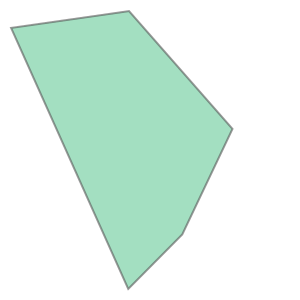

In [103]:
large_airport.unary_union.convex_hull

In [104]:
large_airport.unary_union.convex_hull.plot()

AttributeError: 'Polygon' object has no attribute 'plot'

<Axes: >

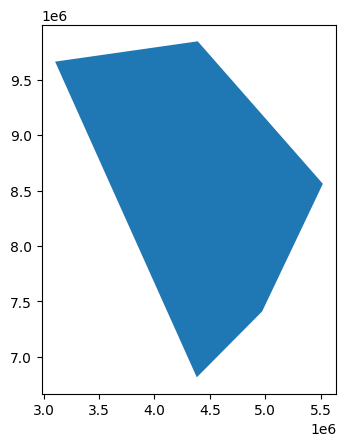

In [105]:
# but it will for a series
gpd.GeoSeries(large_airport.unary_union.convex_hull).plot()

In [106]:
# as gdf
LargeAirport_hull=gpd.GeoSeries(large_airport.unary_union.convex_hull).to_frame()
LargeAirport_hull

0
0  POLYGON ((4382272.317 6814299.684, 3103184.311...

In [107]:
#next steps
LargeAirport_hull.rename(columns={0:'geometry'},inplace=True)
LargeAirport_hull['name']='large airports hull' # optional
LargeAirport_hull=LargeAirport_hull.set_geometry('geometry')
LargeAirport_hull.crs="EPSG:5641"
# verifying:
LargeAirport_hull.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

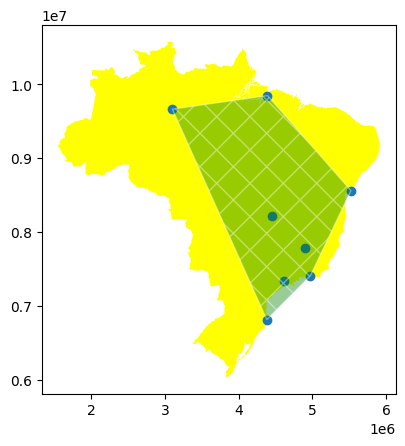

In [108]:
base=brazil_5641.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [110]:
LargeAirport_hull.explore()

In [111]:
# non valid
brazil_states_5641[~brazil_states_5641.is_valid]

ADM0_EN ADM0_PT ADM0_PCODE             ADM1_PT ADM1_PCODE  \
0   Brazil  Brasil         BR                Acre       BR12   
4   Brazil  Brasil         BR               Bahia       BR29   
8   Brazil  Brasil         BR               Goiás       BR52   
10  Brazil  Brasil         BR         Mato Grosso       BR51   
11  Brazil  Brasil         BR  Mato Grosso do Sul       BR50   
12  Brazil  Brasil         BR        Minas Gerais       BR31   
13  Brazil  Brasil         BR                Pará       BR15   
15  Brazil  Brasil         BR              Paraná       BR41   
18  Brazil  Brasil         BR      Rio de Janeiro       BR33   
21  Brazil  Brasil         BR            Rondônia       BR11   
23  Brazil  Brasil         BR      Santa Catarina       BR42   
26  Brazil  Brasil         BR           Tocantins       BR17   

                                             geometry  
0   MULTIPOLYGON (((2121076.536 8774544.241, 21207...  
4   MULTIPOLYGON (((5477620.095 7981004.282, 54774...  
8   MULTIPOLYGON (((4523710.944 8078141.731, 45242...  
10  MULTIPOLYGON (((3481367.473 8055127.595, 34820...  
11  MULTIPOLYGON (((3391653.754 7483306.350, 33918...  
12  MULTIPOLYGON (((4539375.244 8092113.995, 45390...  
13  MULTIPOLYGON (((4617908.124 9887788.345, 46174...  
15  MULTIPOLYGON (((4272314.502 6993478.644, 42727...  
18  MULTIPOLYGON (((4818918.475 7345068.157, 48189...  
21  MULTIPOLYGON (((3098482.137 8680172.092, 30982...  
23  MULTIPOLYGON (((4217367.074 6602883.454, 42169...  
26  POLYGON ((4551512.852 9002911.855, 4551457.225...

<Axes: >

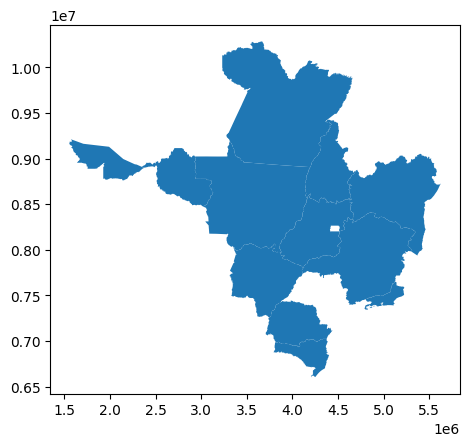

In [112]:
# see the invalid:
brazil_states_5641[~brazil_states_5641.is_valid].plot()

In [ ]:
# what is wrong?

from shapely.validation import explain_validity, make_valid

explain_validity(brazil_states_5641[~brazil_states_5641.is_valid].geometry)

In [ ]:
BrSt5641_valid=brazil_states_5641[~brazil_states_5641.is_valid].copy()
# solving the issue:
BrSt5641_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in BrSt5641_valid['geometry'] ]

In [87]:
# any invalid?
BrSt5641_valid[~BrSt5641_valid.is_valid]

NameError: name 'BrSt5641_valid' is not defined

In [88]:
brazil_municipalities_5641[~brazil_municipalities_5641.is_valid]

ADM0_EN ADM0_PT ADM0_PCODE   ADM1_PT ADM1_PCODE                 ADM2_PT  \
5     Brazil  Brasil         BR  Rondônia       BR11       Colorado do Oeste   
15    Brazil  Brasil         BR  Rondônia       BR11           Pimenta Bueno   
16    Brazil  Brasil         BR  Rondônia       BR11             Porto Velho   
22    Brazil  Brasil         BR  Rondônia       BR11   São Miguel do Guaporé   
36    Brazil  Brasil         BR  Rondônia       BR11         Itapuã do Oeste   
...      ...     ...        ...       ...        ...                     ...   
5464  Brazil  Brasil         BR     Goiás       BR52               Matrinchã   
5470  Brazil  Brasil         BR     Goiás       BR52   Monte Alegre de Goiás   
5471  Brazil  Brasil         BR     Goiás       BR52  Montes Claros de Goiás   
5496  Brazil  Brasil         BR     Goiás       BR52          Padre Bernardo   
5512  Brazil  Brasil         BR     Goiás       BR52               Pontalina   

     ADM2_PCODE  ET_ID                                           geometry  
5     BR1100064      5  POLYGON ((3071557.291 8521541.630, 3071367.162...  
15    BR1100189     15  POLYGON ((3057168.663 8724320.552, 3056869.891...  
16    BR1100205     16  POLYGON ((2856305.059 9048717.998, 2857038.410...  
22    BR1100320     22  POLYGON ((2753262.389 8765192.063, 2753595.113...  
36    BR1101104     36  POLYGON ((2801256.168 9023884.917, 2801099.991...  
...         ...    ...                                                ...  
5464  BR5212956   5464  POLYGON ((4141197.917 8313421.144, 4140885.563...  
5470  BR5213509   5470  POLYGON ((4616158.417 8544511.406, 4616233.111...  
5471  BR5213707   5471  MULTIPOLYGON (((4066884.969 8218654.089, 40667...  
5496  BR5215603   5496  POLYGON ((4404321.702 8311359.407, 4404056.880...  
5512  BR5217708   5512  POLYGON ((4263830.576 8058646.220, 4264122.559...  

[256 rows x 9 columns]

In [89]:
explain_validity(brazil_municipalities_5641[~brazil_municipalities_5641.is_valid].geometry)

NameError: name 'explain_validity' is not defined

In [90]:
# varieties?
brazil_municipalities_5641['validity']=[x.split('[')[0] for x in brazil_municipalities_5641.geometry.apply(lambda x: explain_validity(x))]
brazil_municipalities_5641['validity'].value_counts()

NameError: name 'explain_validity' is not defined

In [ ]:
# solving the issue:
brazil_municipalities_5641.drop(columns=['validity'],inplace=True)

BrMun5641_valid=brazil_municipalities_5641.copy()

BrMun5641_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in BrMun5641_valid['geometry'] ]
#any invalid?
BrMun5641_valid[~BrMun5641_valid.is_valid]

In [ ]:
[x for x in BrMun5641_valid["geometry"]]